# Exploratory Data Analysis

Let's check for some high level trends in the data

### Import Libraries and Path

Libraries

In [1]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Data path

In [2]:
data_path_in  = "C:/Users/Ahmed/OneDrive/Documents/projects/procore/01_data/inbound/"
data_path_out = "C:/Users/Ahmed/OneDrive/Documents/projects/procore/01_data/outbound/"

In [3]:
function_path = "C:/Users/Ahmed/OneDrive/Documents/projects/procore/06_functions/"

### Load Data

In [4]:
xgb_train = pd.read_parquet(data_path_out + 'xgb/train.parquet')
xgb_test  = pd.read_parquet(data_path_out + 'xgb/test_aligned.parquet')

print("xgb_train shape:", xgb_train.shape)
print("xgb_test shape:", xgb_test.shape)

xgb_train shape: (1500, 110)
xgb_test shape: (500, 136)


In [5]:
xgb_train.sample(3)

,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,last_scraped_delta,host_since_delta,host_has_profile_pic_t,is_location_exact_t,host_is_superhost_t,host_identity_verified_t,calendar_last_scraped_12/8/2018,instant_bookable_t,require_guest_profile_picture_t,require_guest_phone_verification_t,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,state_Melbourne,"state_Melbourne, Victoria",state_Unknown,state_VIC,state_VIC 3008,state_Vic,state_Victoria,state_vic,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Campsite,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Townhouse,property_type_Villa,city_Bayside,city_Boroondara,city_Brimbank,city_Cardinia,city_Casey,city_Darebin,city_Frankston,city_Glen Eira,city_Greater Dandenong,city_Hobsons Bay,city_Hume,city_Kingston,city_Knox,city_Manningham,city_Maribyrnong,city_Maroondah,city_Melbourne,city_Melton,city_Monash,city_Moonee Valley,city_Moreland,city_Nillumbik,city_Port Phillip,city_Stonnington,city_Whitehorse,city_Whittlesea,city_Wyndham,city_Yarra,city_Yarra Ranges
1108,3101.0,-37.805736,145.019412,1,1.5,1.0,1.0,66,0.0,0.0,2,0,2,7,24,41,50,325,237,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,4.04,2083,4910,True,True,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1279,3065.0,-37.803347,144.974298,2,1.0,1.0,1.0,100,500.0,60.0,1,0,2,14,1,3,25,277,325,97.0,10.0,10.0,10.0,10.0,10.0,10.0,3,6.68,2083,3551,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
58,3068.0,-37.791560,144.984528,2,1.0,1.0,1.0,69,200.0,55.0,1,0,1,5,0,0,0,0,16,95.0,10.0,9.0,10.0,10.0,10.0,9.0,1,0.81,2083,3914,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


### Organize features

Organize features to numerical, categorical, target, drop features

In [6]:
drop_features = ['zipcode']  

numerical_features = xgb_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [feature for feature in numerical_features if feature not in drop_features]

categorical_features = xgb_train.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features = [feature for feature in categorical_features if feature not in drop_features]

target = ['price']

print("drop_features:\t\t", len(drop_features))
print("numerical_features:\t", len(numerical_features))
print("categorical_features:\t", len(categorical_features))
print("target:\t\t\t", len(target))

drop_features:		 1
numerical_features:	 29
categorical_features:	 0
target:			 1


In [9]:
X_train = xgb_train[numerical_features]
y_train = xgb_train[target]

X_test = xgb_test[numerical_features]
y_test = xgb_test[target] 

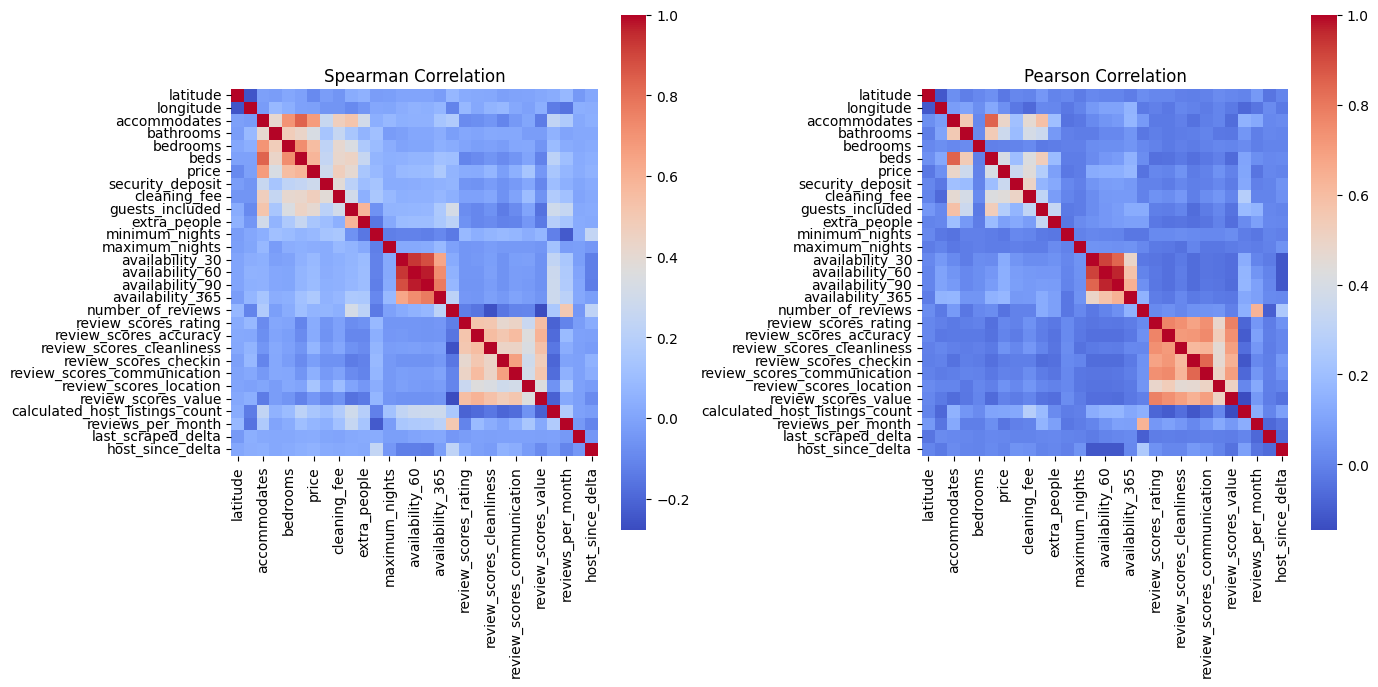

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Spearman correlation matrix
spearman_corr = X_train.corr(method='spearman')

# Calculate the Pearson correlation matrix
pearson_corr = X_train.corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Spearman Correlation Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Spearman Correlation')

# Pearson Correlation Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(pearson_corr, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Pearson Correlation')

# Show the plots
plt.tight_layout()
plt.show()


Target Feature ('price') Statistics:
             price
count  1500.000000
mean    142.670667
std     153.018016
min       0.000000
25%      69.000000
50%     109.000000
75%     162.250000
max    2699.000000


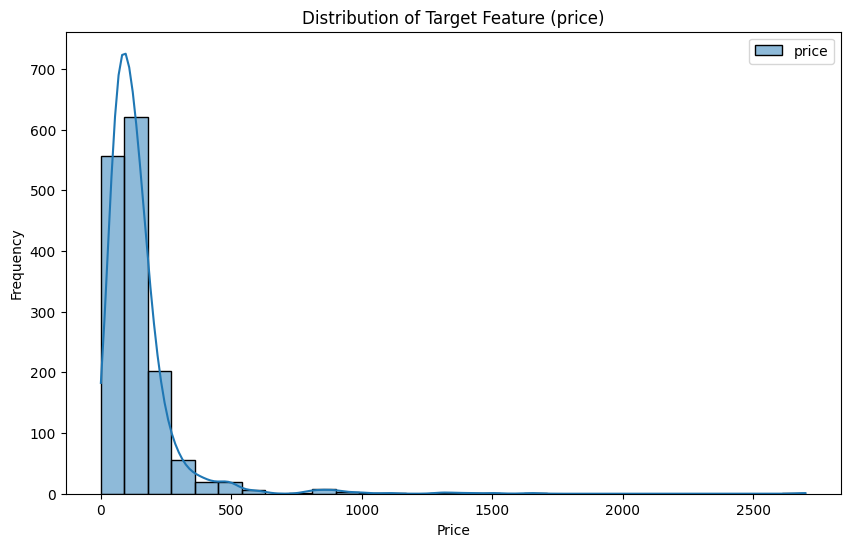

In [14]:
# Print basic statistics
target_stats = y_train.describe()

print("Target Feature ('price') Statistics:")
print(target_stats)

# Plotting the distribution of the target feature
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True, color='blue')
plt.title('Distribution of Target Feature (price)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [20]:
target

['price']

In [19]:
numerical_features

['latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'last_scraped_delta',
 'host_since_delta']

<class 'pandas.core.series.Series'>
Correlation with target (price):
accommodates                      0.487588
cleaning_fee                      0.439423
beds                              0.398896
bathrooms                         0.357567
security_deposit                  0.349864
guests_included                   0.267502
availability_365                  0.168871
availability_60                   0.139731
availability_90                   0.137627
availability_30                   0.127982
calculated_host_listings_count    0.108118
extra_people                      0.086932
review_scores_cleanliness         0.046771
review_scores_location            0.046560
longitude                         0.040683
last_scraped_delta                0.014803
review_scores_rating              0.011612
review_scores_accuracy            0.004438
host_since_delta                  0.004130
review_scores_value               0.000760
bedrooms                          0.000177
review_scores_communication 

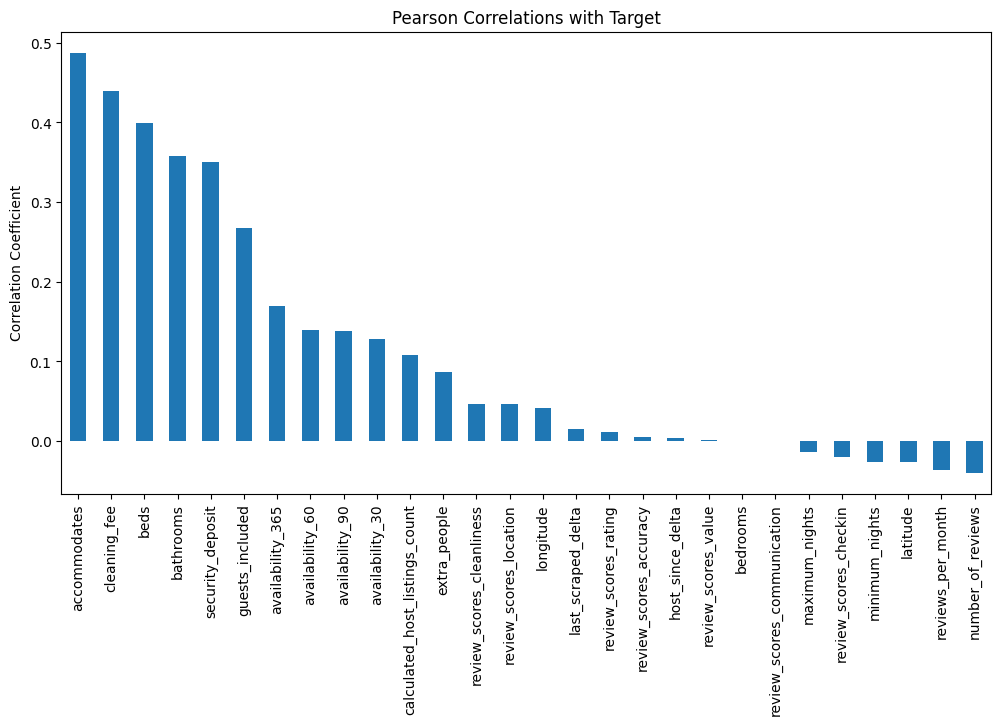

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train contains your features and y_train contains the target

# Combine X_train and y_train into a single DataFrame for easy correlation calculation
train_df = pd.concat([X_train, y_train], axis=1)

# Calculate the Pearson correlation between features and the target
correlations = train_df.corr(method='pearson')

# Extract the correlations with the target feature
correlation_with_target = correlations['price'].drop('price')  # Drop target itself from the list

# If the result is still a DataFrame, select the first column explicitly
if isinstance(correlation_with_target, pd.DataFrame):
    correlation_with_target = correlation_with_target.iloc[:, 0]

# Verify that correlation_with_target is a Series
print(type(correlation_with_target))  # Should print <class 'pandas.core.series.Series'>

# Print out the correlations as a Series
print("Correlation with target (price):")
print(correlation_with_target.sort_values(ascending=False))

# Optionally, visualize the correlations
correlation_with_target.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Pearson Correlations with Target")
plt.ylabel('Correlation Coefficient')
plt.show()


<class 'pandas.core.series.Series'>
Correlation with target (price):
accommodates                      0.674698
beds                              0.583589
bedrooms                          0.555500
cleaning_fee                      0.469089
guests_included                   0.404361
bathrooms                         0.335832
security_deposit                  0.286496
availability_365                  0.158902
calculated_host_listings_count    0.145879
extra_people                      0.144821
review_scores_location            0.137215
availability_90                   0.091974
availability_60                   0.090535
availability_30                   0.083672
minimum_nights                    0.083032
reviews_per_month                 0.071398
review_scores_cleanliness         0.070879
number_of_reviews                 0.057354
host_since_delta                  0.056409
review_scores_communication       0.042614
maximum_nights                    0.033152
review_scores_rating        

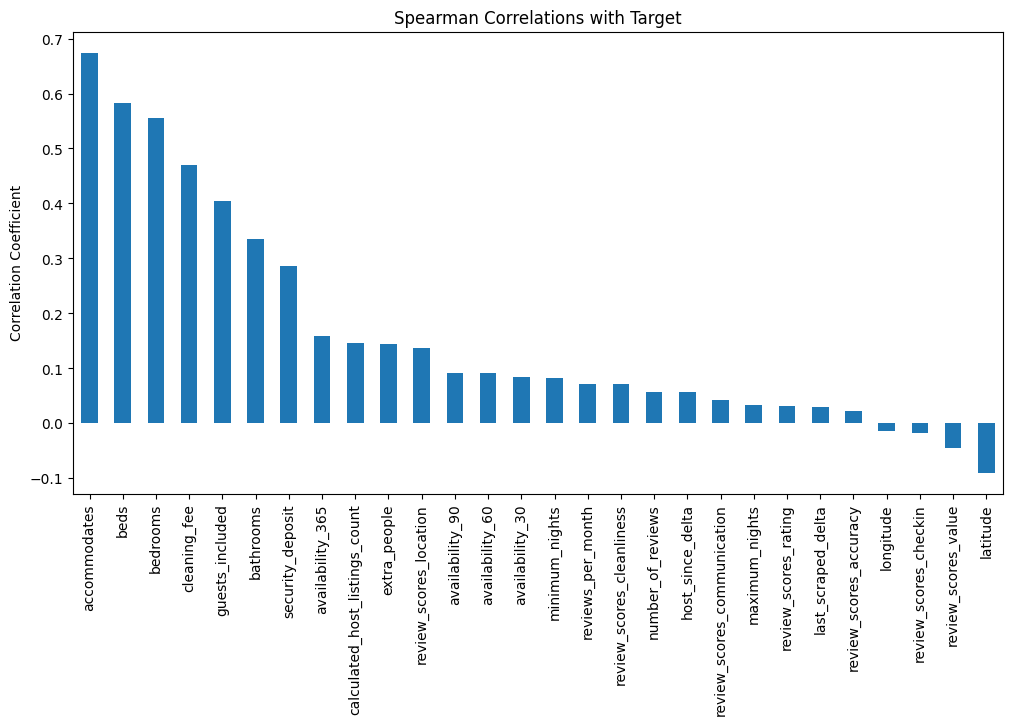

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train contains your features and y_train contains the target

# Combine X_train and y_train into a single DataFrame for easy correlation calculation
train_df = pd.concat([X_train, y_train], axis=1)

# Calculate the Pearson correlation between features and the target
correlations = train_df.corr(method='spearman')

# Extract the correlations with the target feature
correlation_with_target = correlations['price'].drop('price')  # Drop target itself from the list

# If the result is still a DataFrame, select the first column explicitly
if isinstance(correlation_with_target, pd.DataFrame):
    correlation_with_target = correlation_with_target.iloc[:, 0]

# Verify that correlation_with_target is a Series
print(type(correlation_with_target))  # Should print <class 'pandas.core.series.Series'>

# Print out the correlations as a Series
print("Correlation with target (price):")
print(correlation_with_target.sort_values(ascending=False))

# Optionally, visualize the correlations
correlation_with_target.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Spearman Correlations with Target")
plt.ylabel('Correlation Coefficient')
plt.show()
